In [1]:
#Wyco, Shenna Marie P.
#Midterm Part I and II
#CMP - 464

In [324]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from numpy import std
from numpy import cov

%matplotlib inline

In [325]:
# Extract files
import zipfile
with zipfile.ZipFile("house-prices-advanced-regression-techniques.zip", "r") as file:
    file.printdir()
    file.extractall()


File Name                                             Modified             Size
sample_submission.csv                          2018-11-28 22:31:58        31939
data_description.txt                           2018-11-28 22:31:58        13370
test.csv                                       2018-11-28 22:31:58       451405
train.csv                                      2018-11-28 22:31:58       460676


In [326]:
housing_data = pd.read_csv("train.csv")

In [327]:
#The first 5 rows of the dataset

housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [328]:
#Number of instances
len(housing_data.columns)

81

In [329]:
#Number of features 
import collections
print(collections.Counter(housing_data.columns))

print("\n\nNumber of features:", len(housing_data.columns))

Counter({'Id': 1, 'MSSubClass': 1, 'MSZoning': 1, 'LotFrontage': 1, 'LotArea': 1, 'Street': 1, 'Alley': 1, 'LotShape': 1, 'LandContour': 1, 'Utilities': 1, 'LotConfig': 1, 'LandSlope': 1, 'Neighborhood': 1, 'Condition1': 1, 'Condition2': 1, 'BldgType': 1, 'HouseStyle': 1, 'OverallQual': 1, 'OverallCond': 1, 'YearBuilt': 1, 'YearRemodAdd': 1, 'RoofStyle': 1, 'RoofMatl': 1, 'Exterior1st': 1, 'Exterior2nd': 1, 'MasVnrType': 1, 'MasVnrArea': 1, 'ExterQual': 1, 'ExterCond': 1, 'Foundation': 1, 'BsmtQual': 1, 'BsmtCond': 1, 'BsmtExposure': 1, 'BsmtFinType1': 1, 'BsmtFinSF1': 1, 'BsmtFinType2': 1, 'BsmtFinSF2': 1, 'BsmtUnfSF': 1, 'TotalBsmtSF': 1, 'Heating': 1, 'HeatingQC': 1, 'CentralAir': 1, 'Electrical': 1, '1stFlrSF': 1, '2ndFlrSF': 1, 'LowQualFinSF': 1, 'GrLivArea': 1, 'BsmtFullBath': 1, 'BsmtHalfBath': 1, 'FullBath': 1, 'HalfBath': 1, 'BedroomAbvGr': 1, 'KitchenAbvGr': 1, 'KitchenQual': 1, 'TotRmsAbvGrd': 1, 'Functional': 1, 'Fireplaces': 1, 'FireplaceQu': 1, 'GarageType': 1, 'GarageYrB

In [330]:
#Feature names
housing_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [331]:
#Data type of each feature
print("type\n", housing_data.dtypes)

type
 Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      fl

In [332]:
#Number of missing values for each feature

np.sum(housing_data.isnull(), axis=0)

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [333]:
#3. Check if the data types are correctly identified. 
#(A common situation is that a numeric feature is identified as "object")
housing_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [334]:
#4. Handle missing values. There is no standard procedure of missing value imputation. 
#For simplicity, follow the procedure below:
#    - Remove the feature if more than 30% of its values are missing
#    - Remove the rows containing the missing values if less than 5% of values are missing in a column
#    - If the percentage of missing values is between 5% and 30%, fill the missing data with the most 
#      frequent value (categorical feature) or the average value (for numeric feature).
print(list(housing_data.isna().mean().round(4)*100))

for column in housing_data:
    percentage = housing_data[column].isna().mean().round(4) * 100
    # Remove the feature if more than 30% of its values are missing
    if percentage > .30:
        housing_data = housing_data.drop(column, 1)
    if percentage < .05:
    # Remove the rows containing the missing values if less than 5% of values are missing in a column
        housing_data = housing_data.dropna(subset=[column])
    # If the percentage of missing values is between 5% and 30%, fill the missing data with the most 
    # frequent value (categorical feature) or the average value (for numeric feature).
    if .05 <= percentage <= .30:
        if isinstance(housing_data[column], int):
            fill_val = housing_data[column].mean()
        else:
            fill_val = housing_data[column].mode()
        housing_data = housing_data.fillna(value=fill_val)

[0.0, 0.0, 0.0, 17.740000000000002, 0.0, 0.0, 93.77, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5499999999999999, 0.5499999999999999, 0.0, 0.0, 0.0, 2.53, 2.53, 2.6, 2.53, 0.0, 2.6, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06999999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 47.260000000000005, 5.55, 5.55, 5.55, 0.0, 0.0, 5.55, 5.55, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 99.52, 80.75, 96.3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [335]:
# check missing value percentage after imputation
for col in housing_data:
    print(housing_data[col].isna().mean().round(4) * 100)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.06999999999999999
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [336]:
#II: Most relevant features
#The total number of features seems overwhelming, so let's start with a few features that 
#we know are definitely relevant:
#1. OverallQual: Overall material and finish quality
#2. YearBuilt: Original construction date
#3. TotalBsmtSF: Total basement area in square feet
#4. GrLivArea: Above ground living area in square feet

#and of course

#5. SalePrice

#For each of the five features listed above, find:
#1. Descriptive statistics: minimum, mean, median, maximum, standard deviation
#2. Histogram (set title, axis labels properly)
#3. Outliers (values that are too small / too large to be accurate): Remove outliers if there is any.

In [337]:
#1. Overall Qual
#1. Descriptive Statistics

housing_data['YearBuilt'].describe()


count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

Text(0.5, 0, 'Range')

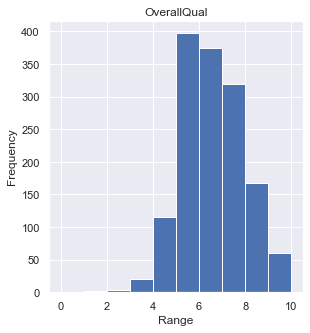

In [338]:
#1. Overall Qual
#2. Histogram (set title, axis labels properly)

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax1.hist(housing_data['OverallQual'], range=(0, 10))
ax1.set_title("OverallQual")
ax1.set_ylabel("Frequency")
ax1.set_xlabel("Range")

In [339]:
#1. Overall Qual
#3. Outliers (values that are too small / too large to be accurate): Remove outliers if there is any.

#Extract OverallQual less that 1
index = (housing_data['OverallQual'] < 1)
housing_data_temp = housing_data[index]
housing_data_temp.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [340]:

#Extract OverallQual greater that 10
index2 = (housing_data['OverallQual'] > 10)
housing_data_temp = housing_data[index2]
housing_data_temp.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [341]:
#2. YearBuilt: Original construction date
#1. Descriptive Statistics

housing_data['YearBuilt'].describe()

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

Text(0.5, 0, 'Range')

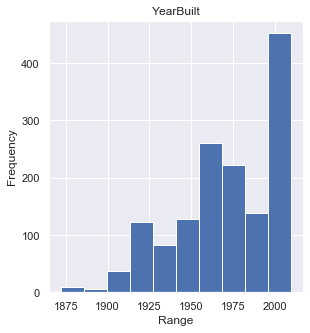

In [342]:
#2. YearBuilt: Original construction date
#2. Histogram (set title, axis labels properly)

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax1.hist(housing_data['YearBuilt'], range=(1872, 2010))
ax1.set_title("YearBuilt")
ax1.set_ylabel("Frequency")
ax1.set_xlabel("Range")

In [343]:
#1. Overall Qual
#3. Outliers (values that are too small / too large to be accurate): Remove outliers if there is any.

#Extract Yearbuilt less than 1871
index3 = (housing_data['YearBuilt'] < 1871)
housing_data_temp = housing_data[index3]
housing_data_temp.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [344]:
#Extract Yearbuilt greater than 2010
index3 = (housing_data['YearBuilt'] > 2010)
housing_data_temp = housing_data[index3]
housing_data_temp.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [345]:
#3. TotalBsmtSF: Total basement area in square feet
    #1. Descriptive statistics: minimum, mean, median, maximum, standard deviation

housing_data['TotalBsmtSF'].describe()

count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64

Text(0.5, 0, 'Range')

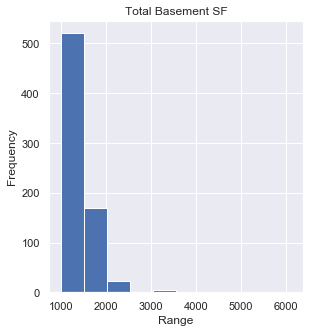

In [346]:
#3. TotalBsmtSF: Total basement area in square feet
    #2.Histogram (set title, axis labels properly)

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax1.hist(housing_data['TotalBsmtSF'], range=(1000, 6110))
ax1.set_title("Total Basement SF")
ax1.set_ylabel("Frequency")
ax1.set_xlabel("Range")

In [347]:
#3. TotalBsmtSF: Total basement area in square feet
   #3. Outliers (values that are too small / too large to be accurate): Remove outliers if there is any.

#Extract total basement sf less than 0
index4 = (housing_data['TotalBsmtSF'] < 0)
housing_data_temp = housing_data[index4]
housing_data_temp.head()


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [348]:
#Extract Ttotal basement sf greater than 6110
index3 = (housing_data['TotalBsmtSF'] > 5000)
housing_data_temp = housing_data[index3]
housing_data_temp.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000


In [349]:
#4. GrLivArea: Above ground living area in square feet
    #1. Descriptive statistics: minimum, mean, median, maximum, standard deviation

housing_data['GrLivArea'].describe()

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

Text(0.5, 0, 'Range')

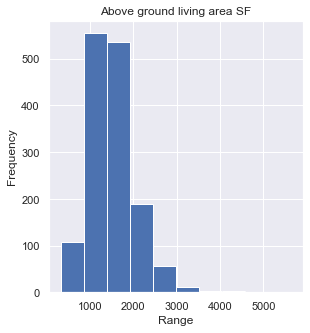

In [350]:
#4. GrLivArea: Above ground living area in square feet
    #2. Histogram (set title, axis labels properly)

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax1.hist(housing_data['GrLivArea'], range=(334, 5642))
ax1.set_title("Above ground living area SF")
ax1.set_ylabel("Frequency")
ax1.set_xlabel("Range")

In [351]:
#4. GrLivArea: Above ground living area in square feet
    #3. Outliers (values that are too small / too large to be accurate): Remove outliers if there is any.

#Extract above ground living area sf less than 334
index5 = (housing_data['GrLivArea'] < 334)
housing_data_temp = housing_data[index5]
housing_data_temp.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [352]:
#Extract above ground living area sf greater than 5642
index6 = (housing_data['GrLivArea'] < 334)
housing_data_temp = housing_data[index6]
housing_data_temp.head()


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [353]:
#5. SalePrice
    #1. Descriptive statistics: minimum, mean, median, maximum, standard deviation

housing_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Text(0.5, 0, 'Price Range')

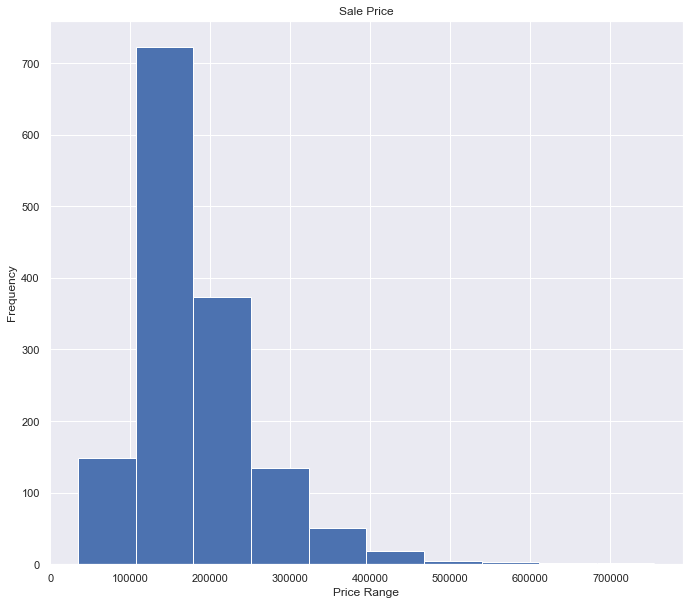

In [354]:
#5. SalePrice
   #2. Histogram (set title, axis labels properly)

fig = plt.figure(figsize=(25, 10))
ax1 = fig.add_subplot(1, 2, 1)
ax1.hist(housing_data['SalePrice'], range=(34900, 755000))
ax1.set_title("Sale Price")
ax1.set_ylabel("Frequency")
ax1.set_xlabel("Price Range")

In [355]:
#5. SalePrice
    #3. Outliers (values that are too small / too large to be accurate): Remove outliers if there is any.

#Extract sales price less than 34900
index5 = (housing_data['SalePrice'] < 34900)
housing_data_temp = housing_data[index5]
housing_data_temp.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [356]:
#Extract sales price greater than 34900
index5 = (housing_data['SalePrice'] > 755000)
housing_data_temp = housing_data[index5]
housing_data_temp.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [357]:
# III: Bivariate analysis

#For each of the four chosen predictive features:
#1. Draw the scatter plot of this feature against SalePrice (set title, axis label properly).
#2. Calculate the correlation coefficient
#3. Describe what you discover: positive correlation, negative correlation, no correlation


Analysis: There is a strong correlation between overall quality and sale price.


Correlation coefficient: [[1.        0.7909816]
 [0.7909816 1.       ]]


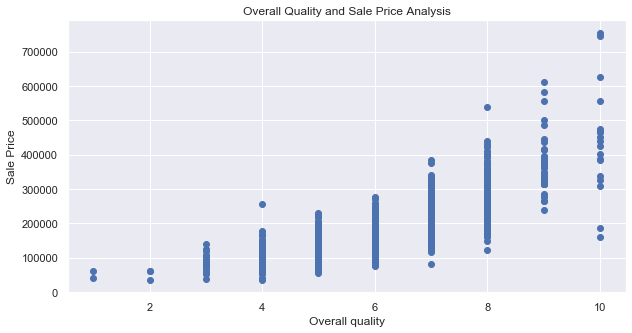

In [358]:
fig = plt.figure(figsize=(10, 5))
plt.scatter(housing_data['OverallQual'], housing_data['SalePrice'])
plt.title("Overall Quality and Sale Price Analysis")
plt.ylabel("Sale Price")
plt.xlabel("Overall quality")


print("Analysis: There is a strong correlation between overall quality and sale price.")

print("\n\nCorrelation coefficient:", np.corrcoef(housing_data['OverallQual'], housing_data['SalePrice']))

Analysis: There is no correlation between year built and sale price


Correlation coefficient: [[1.         0.52289733]
 [0.52289733 1.        ]]


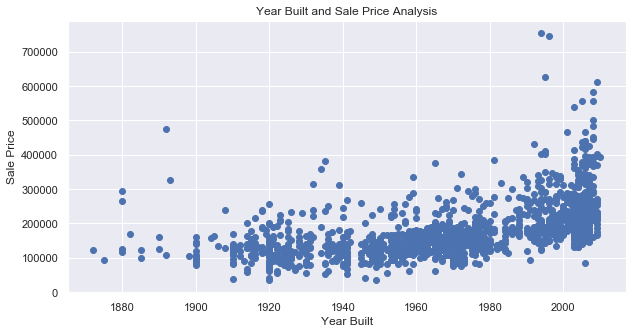

In [359]:
fig = plt.figure(figsize=(10, 5))
plt.scatter(housing_data['YearBuilt'], housing_data['SalePrice'])
plt.title("Year Built and Sale Price Analysis")
plt.ylabel("Sale Price")
plt.xlabel("Year Built")


print("Analysis: There is no correlation between year built and sale price")
print("\n\nCorrelation coefficient:", np.corrcoef(housing_data['YearBuilt'], housing_data['SalePrice']))

Analysis: There is no correlation between basement area sf and sale price


Correlation coefficient: [[1.         0.61358055]
 [0.61358055 1.        ]]


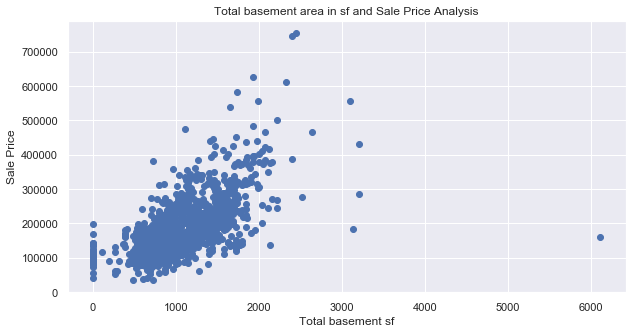

In [360]:
fig = plt.figure(figsize=(10, 5))
plt.scatter(housing_data['TotalBsmtSF'], housing_data['SalePrice'])
plt.title("Total basement area in sf and Sale Price Analysis")
plt.ylabel("Sale Price")
plt.xlabel("Total basement sf")

print("Analysis: There is no correlation between basement area sf and sale price")

print("\n\nCorrelation coefficient:", np.corrcoef(housing_data['TotalBsmtSF'], housing_data['SalePrice']))

Analysis: There is no correlation between above ground living area and sale price


Correlation coefficient: [[1.         0.70862448]
 [0.70862448 1.        ]]


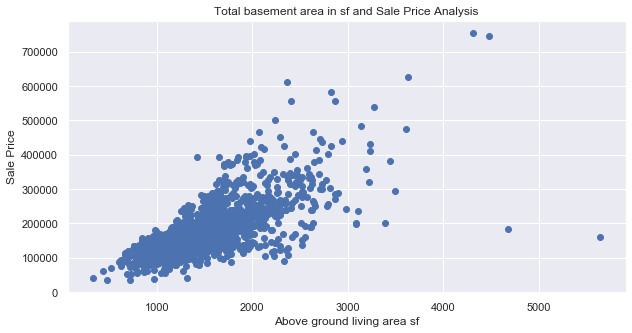

In [361]:
fig = plt.figure(figsize=(10, 5))
plt.scatter(housing_data['GrLivArea'], housing_data['SalePrice'])
plt.title("Total basement area in sf and Sale Price Analysis")
plt.ylabel("Sale Price")
plt.xlabel("Above ground living area sf")

print("Analysis: There is no correlation between above ground living area and sale price")

print("\n\nCorrelation coefficient:", np.corrcoef(housing_data['GrLivArea'], housing_data['SalePrice']))

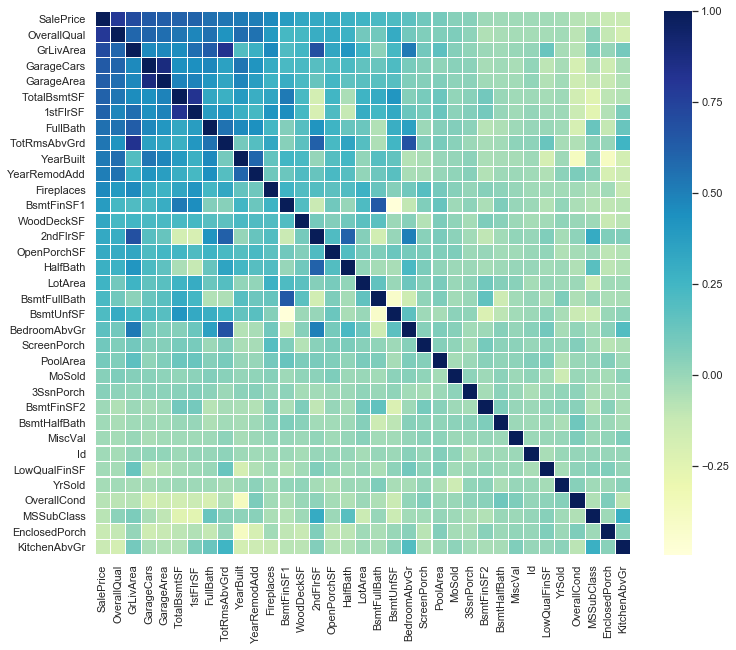

In [362]:
#IV. Identify additional relevant feature
#Previously we have found 4 features that are useful for predicting the sale price. 
#Let’s find out if there are other features that we should consider as well.
#1. Find features with high correlation: For each numeric feature, 
#calculate its correlation coefficient with feature SalePrice. 
#Identify one feature (other than aforementioned 5 features) that has the strongest correlation with the sale prices.

corrmat = housing_data.corr()

k = 81
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index

cm = np.corrcoef(housing_data[cols].values.T)
f, ax = plt.subplots(figsize = (12, 10))

sns.heatmap(cm, ax = ax, cmap ="YlGnBu",
            linewidths = 0.1, yticklabels = cols.values,
                              xticklabels = cols.values)

Analysis: There is a strong correlation between garage cars number and sale price


Correlation coefficient: [[1.         0.62343144]
 [0.62343144 1.        ]]


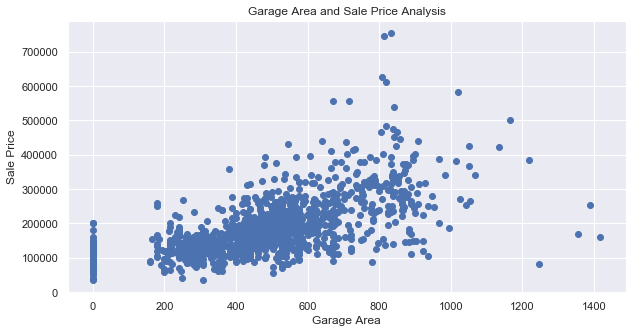

In [363]:
fig = plt.figure(figsize=(10, 5))
plt.scatter(housing_data['GarageArea'], housing_data['SalePrice'])
plt.title("Garage Area and Sale Price Analysis")
plt.ylabel("Sale Price")
plt.xlabel("Garage Area")

print("Analysis: There is a strong correlation between garage cars number and sale price")
print("\n\nCorrelation coefficient:", np.corrcoef(housing_data['GarageArea'], housing_data['SalePrice']))

In [364]:
#Feature engineering: Based on our experience, 
#the total area of the house and the average area per room should also be important factors in determining the price. 
#Please create these two columns using the following formula:
#1) total area = total area above ground (“GrLivArea”) + total basement area (“TotalBsmtSF”)
#2) area per room = total area above ground (“GrLivArea”) / number of rooms (“TotRmsAbvGrd”).

#At this point, we have selected 7 features that are helpful to predict the sale price: 
#    “OverallQual”, “YearBuilt”, “TotalBasmtSF”, “GrLivArea”, Feature selected in IV.1, “TotalArea”, “AreaPerRoom”. 


In [365]:
TotalArea = (housing_data.GrLivArea + housing_data.TotalBsmtSF)
housing_data['TotalArea'] = TotalArea

In [366]:
AreaPerRoom = (housing_data.GrLivArea / housing_data.TotRmsAbvGrd)
housing_data['AreaPerRoom'] = AreaPerRoom

In [367]:
housing_data.shape

(1460, 65)

In [368]:
housing_data.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalArea,AreaPerRoom
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,2,2008,WD,Normal,208500,2566,213.750000
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,5,2007,WD,Normal,181500,2524,210.333333
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,9,2008,WD,Normal,223500,2706,297.666667
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,2,2006,WD,Abnorml,140000,2473,245.285714
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,12,2008,WD,Normal,250000,3343,244.222222


In [369]:
#V. Prepare data for k-Nearest-Neighbor method.
#1. Create a new data frame with SalePrice and the 7 selected features.

hd_raw = housing_data[['SalePrice', 'OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'GarageArea', 
                                'AreaPerRoom', 'TotalArea']].copy()

In [370]:
hd_raw.head()

,SalePrice,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,GarageArea,AreaPerRoom,TotalArea
0,208500,7,2003,856,1710,548,213.750000,2566
1,181500,6,1976,1262,1262,460,210.333333,2524
2,223500,7,2001,920,1786,608,297.666667,2706
3,140000,7,1915,756,1717,642,245.285714,2473
4,250000,8,2000,1145,2198,836,244.222222,3343


In [371]:
#2. For each of the 7 selected features, calculate its mean value and standard deviation. 
#(These values will be used in V.3 and VI.1.)

hd_raw.describe()

,SalePrice,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,GarageArea,AreaPerRoom,TotalArea
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,6.099315,1971.267808,1057.429452,1515.463699,472.980137,230.905362,2572.893151
std,79442.502883,1.382997,30.202904,438.705324,525.480383,213.804841,44.740397,823.598492
min,34900.000000,1.000000,1872.000000,0.000000,334.000000,0.000000,120.000000,334.000000
25%,129975.000000,5.000000,1954.000000,795.750000,1129.500000,334.500000,199.000000,2014.000000
50%,163000.000000,6.000000,1973.000000,991.500000,1464.000000,480.000000,226.500000,2479.000000
75%,214000.000000,7.000000,2000.000000,1298.250000,1776.750000,576.000000,256.107143,3008.500000
max,755000.000000,10.000000,2010.000000,6110.000000,5642.000000,1418.000000,470.166667,11752.000000


In [372]:
#3. Feature normalization: the kNN method usually works best if the features have the similar range, 
#   and each feature follows a normal (bell-shaped) distribution. 
#   To achieve this, subtract each column with its mean value, and then divide by its deviation.

columns = ['SalePrice', 'OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'GarageArea', 
                                'AreaPerRoom', 'TotalArea']

means = {}
stds = {}

for col in columns:
    mean = hd_raw[col].mean()
    std = hd_raw[col].std()
    hd_raw[col] = (hd_raw[col] - mean) / std
    means[col] = mean
    stds[col] = std
    
hd_raw.head()


,SalePrice,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,GarageArea,AreaPerRoom,TotalArea
0,0.347154,0.651256,1.050634,-0.459145,0.370207,0.350880,-0.383442,-0.008370
1,0.007286,-0.071812,0.156680,0.466305,-0.482347,-0.060710,-0.459809,-0.059365
2,0.535970,0.651256,0.984415,-0.313261,0.514836,0.631510,1.492193,0.161616
3,-0.515105,0.651256,-1.862993,-0.687089,0.383528,0.790533,0.321418,-0.121289
4,0.869545,1.374324,0.951306,0.199611,1.298881,1.697903,0.297647,0.935051


In [268]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [373]:
#Predictor Variables

hd_raw['SalePrice-OverallQual'] = hd_raw.SalePrice -hd_raw.OverallQual
hd_raw['SalePrice-YearBuilt'] = hd_raw.SalePrice -hd_raw.YearBuilt
hd_raw['SalePrice-TotalBsmtSF'] = hd_raw.SalePrice -hd_raw.TotalBsmtSF
hd_raw['SalePrice-GrLivArea'] = hd_raw.SalePrice -hd_raw.GrLivArea
hd_raw['SalePrice-GarageArea'] = hd_raw.SalePrice -hd_raw.GarageArea
hd_raw['SalePrice-AreaPerRoom'] = hd_raw.SalePrice -hd_raw.AreaPerRoom
hd_raw['SalePrice-TotalArea'] = hd_raw.SalePrice -hd_raw.TotalArea

X = hd_raw[['SalePrice-OverallQual', 'SalePrice-YearBuilt', 'SalePrice-TotalBsmtSF', 
             'SalePrice-GrLivArea', 'SalePrice-GarageArea', 'SalePrice-AreaPerRoom',  'SalePrice-TotalArea']]
X.head()

,SalePrice-OverallQual,SalePrice-YearBuilt,SalePrice-TotalBsmtSF,SalePrice-GrLivArea,SalePrice-GarageArea,SalePrice-AreaPerRoom,SalePrice-TotalArea
0,-0.304102,-0.703480,0.806299,-0.023052,-0.003726,0.730597,0.355524
1,0.079097,-0.149394,-0.459019,0.489632,0.067996,0.467095,0.066651
2,-0.115286,-0.448445,0.849231,0.021134,-0.095540,-0.956223,0.374354
3,-1.166361,1.347889,0.171984,-0.898632,-1.305638,-0.836522,-0.393816
4,-0.504779,-0.081761,0.669933,-0.429336,-0.828358,0.571897,-0.065507


In [374]:
#Target Variable
Y= np.where(hd_raw['SalePrice'].shift(-1)>hd_raw['SalePrice'],1,-1)

In [375]:
#Splitting the data set

split_percentage = 0.7
split = int(split_percentage*len(hd_raw))

X_train = X[:split]
Y_train = Y[:split]
            
X_test = X[split:]
Y_test = Y[split:]

In [2]:
#Instantiate KNN (k=5)
knn = KNeighborsClassifier(n_neighbors=15)
#fit the mode

knn.fit(X_train, Y_train)

#Accuracy Score
accuracy_train = accuracy_score(Y_train, knn.predict(X_train))
accuracy_test = accuracy_score(Y_test, knn.predict(X_test))


print('Train_data Accuracy: %.2f' %accuracy_train)
print('Test_data Accuracy: %.2f' %accuracy_test)

NameError: name 'KNeighborsClassifier' is not defined

In [1]:
predictions = knn.predict(X_train)

NameError: name 'knn' is not defined

In [378]:
predictions

array([-1,  1, -1, ...,  1, -1,  1])